<a href="https://colab.research.google.com/github/PaulAlexInc/BikeSharing-dataset/blob/main/BikeSharing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#LINEAR REGRESSION

## Bike Sharing Dataset<br>

UCI Machine Learning Repository

[Bike Sharing Dataset](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset)<br>

Note: upload the day.csv file during each runtime

Abstract: This dataset contains the hourly and daily count of rental bikes between years 2011 and 2012 in Capital bikeshare system with the corresponding weather and seasonal information.

*Attribute* Information:

Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv

- instant: record index
- dteday : date
- season : season (1:winter, 2:spring, 3:summer, 4:fall)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from [Web Link])
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit :
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

Predict the count based on various factors

In [ ]:
                             # importing libraries
# always import the libraries in the first cell, its a standard
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split   # train_test_split is used to perform splitting
from sklearn.metrics import r2_score                   # accuracy measure for the model- from a subpackage called metrics
from sklearn.metrics import mean_squared_error         # accuracy measure for the model
from sklearn.linear_model import LinearRegression

from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from pickle import dump # helps us to dump or save these models and scalers

In [ ]:
data=pd.read_csv("day.csv")
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


- matemp    : adjusted temperature is the feeling temperature i.e how it feels like<br>
- since we are working with day.csv, the information is given for each day of the two years the data was collected<br>
- instant is like an identifier or sort of an index, doesn't store any data as such<br>
- cnt = casual+registered

- The cnt variable is simply the sum of casual and registered, this cnt variable is our target variable i.e what we want to predict<br>

- ### We need to predict the number of bikes that will be rented out on a specific day depending on the weather conditions and other factors like weather it is a week day or a holiday 



In [ ]:
data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


### Note : In the website, Missing values is given as N/A

In [ ]:
data.isnull()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
727,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
728,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
729,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [ ]:
#first we start by dropping the columns we don't need for the task, i.e instant', 'dteday', 'casual', 'registered'

data.drop(['instant', 'dteday', 'casual', 'registered'], axis=1, inplace = True )
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


- We mainly study the correlation between the "numerical" variables
- here the numerical variables are: temp,	atemp,	hum,	windspeed,	cnt(target variable)

In [ ]:
# suppose we find the correlation between temp and cnt variables
data.temp.corr(data.cnt)

0.6274940090334917

In [ ]:
# we can do it the other way also
# correlation between temp and cnt variables 
data.cnt.corr(data.temp)

0.6274940090334917

- Is the correlation between temp and cnt variables positive or negative?<br>
Ans: Positive<br>

- ### This shows that the number of bikes rented out increased with the increase in temperature<br>


### Why did we get the same value on reversing the cnt and temp variables?<br>
-r(x,y)=r(y,x)<br>
-Swapping the variables in the formula we get the same value<br>
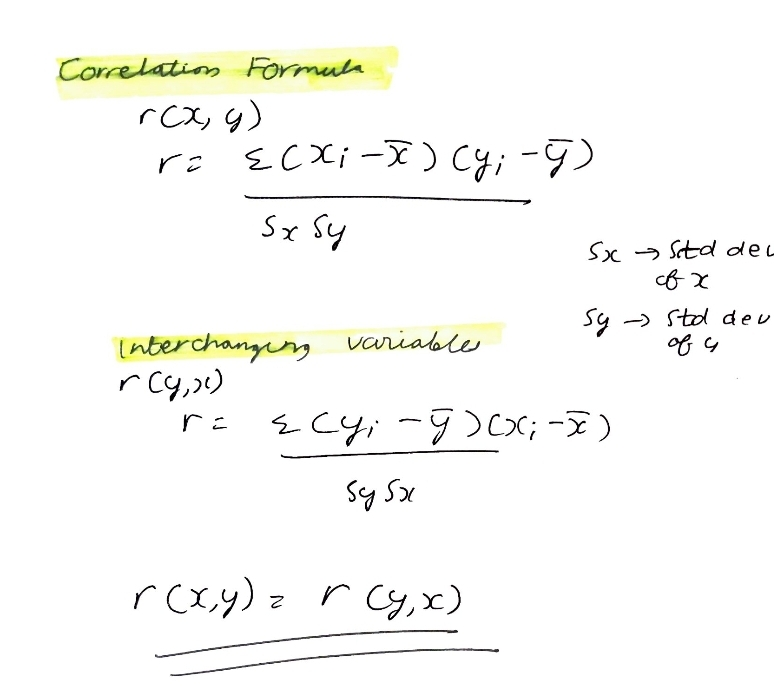

Generally the usual range we consider is<br>


- 0 - 0.4 ->weak correlation <br>
- 0.4 - 0.7 ->moderate correlation <br>
- 0.7 - 1.0 ->strong correlation <br>

Note that this is just the magnitude, it can either be " + or - "<br>

- Now is the correlation between temp and cnt variables a weak, moderate or strong correlation?<br>

Ans: moderate

In [ ]:
# to find the correlation of cnt with all the other four numerical variables all at once


In [ ]:
data.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [ ]:
#correlation of all numerical variables
# use the correlation function specifying the dataframe you want to use it on
data[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr()

,temp,atemp,hum,windspeed,cnt
temp,1.000000,0.991702,0.126963,-0.157944,0.627494
atemp,0.991702,1.000000,0.139988,-0.183643,0.631066
hum,0.126963,0.139988,1.000000,-0.248489,-0.100659
windspeed,-0.157944,-0.183643,-0.248489,1.000000,-0.234545
cnt,0.627494,0.631066,-0.100659,-0.234545,1.000000


Correlation between cnt and atemp<br>
- There is a moderate and +ve correlation between cnt and atemp<br>

Correlation between cnt and humidity<br>
- There is a -ve and weak correlation between cnt and hum<br>

Correlation between cnt and windspeed<br>
- There is a -ve and weak correlation between cnt and windspeed<br>

Note : Generally when we work with real world data, in very few cases we get strong correlation, usually we get moderate or weak correlations<br>

Why correlation between temp and atemp so high i.e 0.991702, which is almost 1(which is a perfect coorelation)??<br>

  - What is adjusted temp? Ans: Basically it is the real feel temperature which takes into account the humidity and the windspeed, so can we consider it as a transformation of the original temperature variable?

  - so it is obvious that on a very hot day when the temperature is very high, humidity is also high, then the real feel should also be high<br>
  - similarly on a cool day when the wind is blowing, the temperature will actually be low and due to the wind the adjusted temperature (atemp) will also be low.<br>
  - Due to the fact that the adjusted temperature value is just a transformation of the original temperature value, we have this very high correlation value, otherwise while working with real world values, we hardly get such high correlation values, and in the event of such values, don't try to look for some relationship between the values, seeing such values we can understand that there is a very high correlation between them

If we have many variables like 10, 20 or even 30 variables, it gets difficult to understand which are the significant correlations in the above matrix form, so we represnt that information using a heatmap, which is a visualisation plot which displays information based on colours. We can create heatmaps using seaborn.

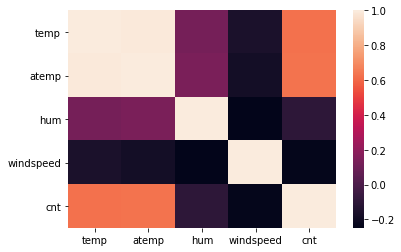

In [ ]:
#heatmap
sns.heatmap(data[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr())

- light shade-> high positive correlation
- darker shade-> negative correlation

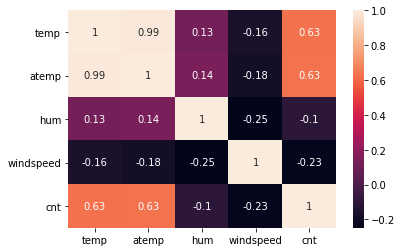

In [ ]:
#heatmap
sns.heatmap(data[['temp','atemp','hum','windspeed','cnt']].corr(), annot=True)
# annot=True gives correlation values in the squares

In [ ]:
data.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

# Preprocessing the dataset

Note that:
- cnt is our target variable
- all other variables are our predictor variables
- we have both numerical and categorical predictor cariables

###*Data* Encoding

In [ ]:
for uni in data.columns:
  print(uni)
  print(data[uni].unique())

season
[1 2 3 4]
yr
[0 1]
mnth
[ 1  2  3  4  5  6  7  8  9 10 11 12]
holiday
[0 1]
weekday
[6 0 1 2 3 4 5]
workingday
[0 1]
weathersit
[2 1 3]
temp
[0.344167  0.363478  0.196364  0.2       0.226957  0.204348  0.196522
 0.165     0.138333  0.150833  0.169091  0.172727  0.16087   0.233333
 0.231667  0.175833  0.216667  0.292174  0.261667  0.1775    0.0591304
 0.0965217 0.0973913 0.223478  0.2175    0.195     0.203478  0.216522
 0.180833  0.192174  0.26      0.186957  0.211304  0.285833  0.271667
 0.220833  0.134783  0.144348  0.189091  0.2225    0.316522  0.415
 0.266087  0.318261  0.435833  0.521667  0.399167  0.285217  0.303333
 0.182222  0.221739  0.295652  0.364348  0.2825    0.343478  0.407273
 0.266667  0.335     0.198333  0.384167  0.376522  0.261739  0.2925
 0.295833  0.389091  0.329167  0.384348  0.325217  0.317391  0.365217
 0.54      0.4725    0.3325    0.430435  0.441667  0.346957  0.285
 0.264167  0.265833  0.253043  0.264348  0.3025    0.3       0.268333
 0.315     0.378333

In [ ]:
data = pd.get_dummies(data, columns=['season', 'mnth', 'weekday', 'weathersit'])
data.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_1,season_2,season_3,season_4,mnth_1,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3
0,0,0,0,0.344167,0.363625,0.805833,0.160446,985,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,0,0,0,0.363478,0.353739,0.696087,0.248539,801,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2,0,0,1,0.196364,0.189405,0.437273,0.248309,1349,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,0,0,1,0.200000,0.212122,0.590435,0.160296,1562,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
4,0,0,1,0.226957,0.229270,0.436957,0.186900,1600,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0


In [ ]:
data.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_1', 'season_2', 'season_3', 'season_4', 'mnth_1',
       'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8',
       'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12', 'weekday_0', 'weekday_1',
       'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6',
       'weathersit_1', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [ ]:
data.shape

(731, 34)

###  Creating target and predictor variables

In [ ]:
# usually the target variable is represented by y and the predictor variable by x
#we can create x (predictor) variables by dropping the target variables from the dataframe  


x = data.drop(['cnt'], axis = 1)        # predictor variable
y=data['cnt']                           # target variable

print(x.shape)a
print(y.shape)

(731, 33)
(731,)


- Predictor variable has 33 columns and 731 rows<br>
- Target variable is a 1D array of values

###*Data* Scaling

In [ ]:
scaler = StandardScaler()

In [ ]:
scale_x=scaler.fit(x)
x_scaled= scale_x.transform(x)
# while doing the same for y, we need to reshape it since it is a 1D array



In [ ]:
x.shape

(731, 33)

In [ ]:
# we need to save the scaler functions also
dump(scale_x, open('scaler_x_reg.pkl','wb'))

In [ ]:
scale_y=scaler.fit(np.array(y).reshape(-1,1))
scale_y

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
# transforming y values
y_scaled=scaler.transform(np.array(y).reshape(-1,1))

In [ ]:
dump(scale_y, open('scaler_y_reg.pkl','wb'))

In [ ]:
x_scaled[0]

array([-1.00136893, -0.171981  , -1.47122472, -0.82666213, -0.67994602,
        1.25017133, -0.38789169,  1.74317929, -0.57998298, -0.5884086 ,
       -0.56734527,  3.28486264, -0.29080876, -0.30442673, -0.29902973,
       -0.30442673, -0.29902973, -0.30442673, -0.30442673, -0.29902973,
       -0.30442673, -0.29902973, -0.30442673, -0.40955052, -0.40955052,
       -0.40727045, -0.40727045, -0.40727045, -0.40727045,  2.4417012 ,
       -1.31438653,  1.39982648, -0.171981  ])

In [ ]:
y_scaled[0]

array([-1.81795256])

In [ ]:
x_scaled.shape

(731, 33)

In [ ]:
y_scaled.shape

(731, 1)

#Splitting the dataset

In [ ]:
#Another advantage of python is that we can declare multiple variables at once
#for eg:
a, b = 10,15
print(a)
print(b)

10
15


In [ ]:
# we are going to use the same feature here
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_scaled, test_size=0.30, random_state=0)
# test_size=0.30 : we are allocating 30% of the data as the test set
# random_state can be any integer, its like setting the seat
print(x_train.shape)
print(x_test.shape)

(511, 33)
(220, 33)


Setting the seat means whenever we are generating the data, if the seat is set to a specific value, the data will be generated in the exact same way or the time. Everytime we run the cell, or when we run the code, the exact same data will be generated<br>

 How does it work here?<br>
- When we are splitting the dataset, lets say we want to split the dataset of 100 rows into train and test set, where the test set should contain 30 rows. <br>
  How many ways can this be done in?<br>
  - We can take the first 70 as the training set and the last 30 as the test set.<br>
  OR
  -  We can take the first 30 as the test set and the last 70 as the training set.<br>
  OR
  -We can take alternately in a way that the first rowgoes to the test set, second to training set, third to test set, fourth to training set, .... till we get 30 rows in test set and after that all the left over rows do to the training set
  OR
  - We take the middle 30 rows as the test set and everything else as the training set
  etc......<br>
  There are multiple ways of creating the train and test sets<br>

So, setting the random_state=0 ensures that whenever we run this code, the exact same test and train sets are created, So everytime we run this cell or anyone else runs this notebook, the same test and training sets are generated<br>

How this helps?<br>
- It helps maintain cohersion over multiple users.<br>

If random_state is not set-<br> 
Suppose one person gets 60% accuracy and then he/she asks another person to improve it, since ransom_state is not set, so it is obvious that when a different person runs the code, a different training and test set will be generated, so it is possible that for that specific test and training sets the accuracy will be different. 





In the above case 511 rows have gone to the train set, and 220 rows have gone to the test set

#Baseline Model

- Baseline model is one which can be built without excessive computational need. Every other model that we create should be better than the baseline model
-In linear regression Baseline prediction - is the average value of dependent variable.


In [ ]:
#predictions of baseline model

# What can serve as a baseline model for a linear regression model?
# The mean of the observed y values

y_pred_bl = np.repeat(np.mean(y_train), len(y_test))# we are repeating the same value(mean(y_train)) 220 times(i.e the length of y_test)
# y_pred_bl : prediction of baseline model

y_pred_bl.shape

(220,)

In [ ]:
y_pred_bl
#all these values are equal to the mean of the training set(y_train)

array([-0.00847648, -0.00847648, -0.00847648, -0.00847648, -0.00847648,
       -0.00847648, -0.00847648, -0.00847648, -0.00847648, -0.00847648,
       -0.00847648, -0.00847648, -0.00847648, -0.00847648, -0.00847648,
       -0.00847648, -0.00847648, -0.00847648, -0.00847648, -0.00847648,
       -0.00847648, -0.00847648, -0.00847648, -0.00847648, -0.00847648,
       -0.00847648, -0.00847648, -0.00847648, -0.00847648, -0.00847648,
       -0.00847648, -0.00847648, -0.00847648, -0.00847648, -0.00847648,
       -0.00847648, -0.00847648, -0.00847648, -0.00847648, -0.00847648,
       -0.00847648, -0.00847648, -0.00847648, -0.00847648, -0.00847648,
       -0.00847648, -0.00847648, -0.00847648, -0.00847648, -0.00847648,
       -0.00847648, -0.00847648, -0.00847648, -0.00847648, -0.00847648,
       -0.00847648, -0.00847648, -0.00847648, -0.00847648, -0.00847648,
       -0.00847648, -0.00847648, -0.00847648, -0.00847648, -0.00847648,
       -0.00847648, -0.00847648, -0.00847648, -0.00847648, -0.00

Now that we have predictions and we also have observed values, we can calculate the accuracy<br>

- We'll be using two measures<br>
    - r2_score - threshold every other model has to cross
    - Mean squared error - basically the term that we minimised in linear regression


In [ ]:
mean_squared_error(y_test, y_pred_bl) 

1.1020449461162247

In order to measure the accuracy, we need to test the model. 
y_test in the observed/true value which has to be passed as a parameter.
y_pred_bl is the estimated or predicted value

In [ ]:
r2_score(y_test, y_pred_bl)

-0.0007203343144406293

Here, we are getting an r2_score(measure of accuracy) as -0.0007203343144406293 which is almost equivalent to zero, so the baseline model is useless here. This value (-0.0007203343144406293) is the threshold that every other model has to cross.

Next Step : Apply algorithm to create a model

- The algorithm we're using here is linear regression(as mentioned in the dataset source)
- We usually make the first model with all the variables that we have 

# Linear regression with all the variables

In [ ]:
model1 = LinearRegression()

In [ ]:
model1.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#trying out the different parameters 
model1.intercept_#intercept is basically the constant term

array([-0.01755467])

In [ ]:
model1.coef_

array([[ 4.94893370e-01, -4.25547322e+12, -1.18440446e+13,
        -2.78806568e-01,  6.75813687e-01, -1.27508023e-01,
        -1.74629097e-01, -2.49021589e+12, -2.50391132e+12,
        -2.52171039e+12, -2.47621834e+12,  3.96468579e+12,
         3.81563872e+12,  3.96468579e+12,  3.90604063e+12,
         3.96468579e+12,  3.90604063e+12,  3.96468579e+12,
         3.96468579e+12,  3.90604063e+12,  3.96468579e+12,
         3.90604063e+12,  3.96468579e+12, -3.15932300e+12,
         5.77560087e+12,  5.75262146e+12,  5.75262146e+12,
         5.75262146e+12,  5.75262146e+12, -3.15932300e+12,
        -3.68674007e+12, -3.61872670e+12, -1.27797821e+12]])

In [ ]:
y_pred1 = model1.predict(x_test)

In [ ]:
y_pred1


array([[-1.04317743e-01],
       [ 2.84354132e-01],
       [-1.50470837e+00],
       [-1.63654431e+00],
       [-4.96302427e-02],
       [-1.45644045e+00],
       [ 8.02525698e-02],
       [ 5.09940070e-01],
       [ 8.83963507e-01],
       [-1.70685681e+00],
       [-1.48517712e+00],
       [-2.06818493e+00],
       [-1.90900524e+00],
       [-4.01192743e-01],
       [ 1.53494757e-01],
       [-8.69942743e-01],
       [ 1.04216663e+00],
       [ 7.31131476e-01],
       [-7.97677118e-01],
       [-1.03791149e+00],
       [ 1.73650257e+00],
       [-1.15705212e+00],
       [ 1.32010382e-01],
       [-4.55880243e-01],
       [-1.08869274e+00],
       [ 1.10466663e+00],
       [ 7.04276007e-01],
       [ 4.33768195e-01],
       [ 1.28240101e+00],
       [ 4.75760382e-01],
       [-2.07502087e+00],
       [ 6.08572882e-01],
       [ 8.30252570e-01],
       [-8.28333677e-02],
       [-1.78986462e+00],
       [-2.69356805e-01],
       [ 1.22185413e+00],
       [ 1.49529163e+00],
       [-6.6

In [ ]:
mean_squared_error(y_test, y_pred1) ⁸

0.22794176114888096

In [ ]:
#Regression Model is better than the baseline model since the valuw of mean_squared_error is lesser in the linear regression model

In [ ]:
r2_score(y_test, y_pred1)

#r2_score of 1 means a perfect model
#r2_score of 0 basically means a useless model
#r2_score as it increases towards 1, the model gets better and better.


0.7930157420302948

This regression model with all the variables is 80% percent accurate, the baseline model was 0% accurate.

## Descaling the predictions for the user (To make the values understandable to the user/ it has some meaning for the user)

- Before descaling, we need to ensure that the y_scaled variable needs to be fit and then transformed separately in two steps, and fit_transform shouldn't be used at once

In [ ]:
# use inverse_transform on the fitted scaler

scale_y.inverse_transform(y_pred1) 


array([[4302.4015842 ],
       [5054.82600855],
       [1591.40504019],
       [1336.18570027],
       [4408.27034743],
       [1684.84622581],
       [4659.70866008],
       [5491.53465685],
       [6215.60137677],
       [1200.06871898],
       [1629.21531277],
       [ 500.57867624],
       [ 808.73239777],
       [3727.68544098],
       [4801.49718226],
       [2820.23889905],
       [6521.86458467],
       [5919.73599383],
       [2960.1369076 ],
       [2495.07055486],
       [7866.0197749 ],
       [2264.42789212],
       [4759.90588242],
       [3621.81667775],
       [2396.76384615],
       [6642.85745693],
       [5867.74686903],
       [5344.07459379],
       [6986.93093741],
       [5425.36667984],
       [ 487.34508084],
       [5682.47653338],
       [6111.62312717],
       [4343.99288404],
       [1039.37506051],
       [3982.9047809 ],
       [6869.71909241],
       [7399.06290853],
       [3209.68470663],
       [2634.96856341],
       [5981.17768677],
       [1387.229

These numbers make more sense to the user<br>
for eg: [4302.4015842 ] implies that 4302 bikes are rented on a specific day


# Finetuning the Model

To improve the model<br>

Reasons:<be>
- To have a better accuracy than what we currently have<br>
- In the curent model, we have all the variables, for limitations of storage and computation power, even the loading time of the data, or of the output. These will affect the user experience. Due to these reasons, there can be a necessity that we need to make the model work on few variables only, or the model to work on a subset of the entire dataset.
- Another reason is data privacy, if we are working on sensitive data, we don't want loss of data. Lets say, we're using 50 variables when the job can actually be done with 5, so we need to ensure that the data in those 50 variables are protected, which will cost more .

For finetuning the regression model, we'll be using a method called recursive feature elimination, it is exactly what the term means (feature is generally a term used for predictors) i.e to recursively eliminate the features one by one until we are left with the number of features that we want

We currently have 33 features i.e (220, 33). Let's say we just want 10 features in our model, the 10 most important features in our model<br>

What RFA does is 
- It fits a model on the entire data
- It evaluates the importance of each of the variables individually, after that it orders them according to the importance and then it removes the variables which is the least important
- So now, as per our situation, we're left with 32 variables
- Now it will again fit a model on the 32 variables, it will again calculate the importance of each of the predictors, remove the least important one, we're left with 31 variables/predictors

- This process goes on happening until we have 10 predictors

This is how the method works.

In [ ]:
# define the model 
rfe = RFE(estimator = RandomForestRegressor(), n_features_to_select=10) 
# estimator can be any regression algorithm, linearregression, etc
# n_features_to_select is the number of features to select. It can be any number


#fit the data
rfe.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RFE(estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                    criterion='mse', max_depth=None,
                                    max_features='auto', max_leaf_nodes=None,
                                    max_samples=None, min_impurity_decrease=0.0,
                                    min_impurity_split=None, min_samples_leaf=1,
                                    min_samples_split=2,
                                    min_weight_fraction_leaf=0.0,
                                    n_estimators=100, n_jobs=None,
                                    oob_score=False, random_state=None,
                                    verbose=0, warm_start=False),
    n_features_to_select=10, step=1, verbose=0)

In [ ]:
rfe.support_

array([ True, False, False,  True,  True,  True,  True,  True, False,
       False,  True, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False,  True, False,  True])

The true and false imply which features are to be present in the model, here the first feature need to be included in the model, second need not be included in the model. So basically, whichever has the support of true needs to be included in the model and whichever has the false support, need not be included in the model 

To display which variable is included and which is not, we can just print the results in the following form

In [ ]:
cols=x.columns
#names of the predictor variables

In [ ]:
x.shape[0]

731

In [ ]:
x.shape[1]

33

In [ ]:
for i in range(x.shape[1]):⁷
  print('Column: %s, Selected %s, Rank: %.3f' %(cols[i], rfe.support_[i], rfe.ranking_[i]))
 
  # rank 1 means the variable should be selected, otherwise no
  # using rank, we can understand the relevance of each variable

Column: yr, Selected True, Rank: 1.000
Column: holiday, Selected False, Rank: 4.000
Column: workingday, Selected False, Rank: 2.000
Column: temp, Selected True, Rank: 1.000
Column: atemp, Selected True, Rank: 1.000
Column: hum, Selected True, Rank: 1.000
Column: windspeed, Selected True, Rank: 1.000
Column: season_1, Selected True, Rank: 1.000
Column: season_2, Selected False, Rank: 6.000
Column: season_3, Selected False, Rank: 22.000
Column: season_4, Selected True, Rank: 1.000
Column: mnth_1, Selected False, Rank: 12.000
Column: mnth_2, Selected False, Rank: 21.000
Column: mnth_3, Selected False, Rank: 10.000
Column: mnth_4, Selected False, Rank: 8.000
Column: mnth_5, Selected False, Rank: 19.000
Column: mnth_6, Selected False, Rank: 18.000
Column: mnth_7, Selected False, Rank: 23.000
Column: mnth_8, Selected False, Rank: 20.000
Column: mnth_9, Selected False, Rank: 3.000
Column: mnth_10, Selected True, Rank: 1.000
Column: mnth_11, Selected False, Rank: 24.000
Column: mnth_12, Select

Using rank, we can understand the relevance of each variable, all the 1s need to be selected, if we want a 11th feature, it will be working day since it is of rank 2, mnth_9 is the next variable to be selected since it is of rank 3. 

- It gives information like, if we want 10 features, these are the 10 features we must select

In [ ]:
# creating a list to store the selected features
variables = []

In [ ]:
# finding out the selected feature names
for i in range(len(cols)):
  if rfe.support_[i] == True:
    variables.append(cols[i])
 

In [ ]:
len(variables)

10

In [ ]:
variables

['yr',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'season_1',
 'season_4',
 'mnth_10',
 'weathersit_1',
 'weathersit_3']

Next step :  Model with 10 predictor variables

# Model with 10 predictor variables



- We need to repeat the entire process again with these variables
- First we need to make x and y, since this data is already encoded, so we don't need to encode again

- We need to scale and split x and y
- We need to make the regression model

Making the predictor and target variables

In [ ]:
x10 = data[variables]
y10 = data['cnt']

print(x10.shape)
print(y10.shape)

(731, 10)
(731,)


In [ ]:
x.iloc[0].values

array([0.      , 0.      , 0.      , 0.344167, 0.363625, 0.805833,
       0.160446, 1.      , 0.      , 0.      , 0.      , 1.      ,
       0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
       0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
       0.      , 0.      , 0.      , 0.      , 0.      , 1.      ,
       0.      , 1.      , 0.      ])

In [ ]:
scaler = StandardScaler()
x10_scaled = scaler.fit_transform(x10)
scaled_y10 = scaler.fit(np.array(y).reshape(-1,1))
scaled_y10 

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
y10_scaled = scaler.transform(np.array(y).reshape(-1,1))
y10_scaled.shape

(731, 1)

In [ ]:
x10_train, x10_test, y10_train, y10_test = train_test_split(x10_scaled, y10_scaled, test_size=0.3, random_state=0) 

In [ ]:
print(x10_train.shape)
print(x10_test.shape)

(511, 10)
(220, 10)


# Model 2

In [ ]:
model2 = LinearRegression()

In [ ]:
model2.fit(x10_train, y10_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# we need to save this model 
dump(model2, open('model_reg.pkl', 'wb'))
#we're passing the variable that we need to save, which in this case is our model2. open() is used to open the file. We'll pass the filename to which we need to open the model as.
#wb is to write. model2 data will be written into the pickle file.

In [ ]:
y_pred2=model2.predict(x10_test)
y_pred2

array([[ 0.11534487],
       [ 0.29109997],
       [-1.56680153],
       [-1.70821519],
       [-0.34238734],
       [-1.4183377 ],
       [-0.31786605],
       [ 0.78130289],
       [ 0.67036612],
       [-1.7787325 ],
       [-1.67294286],
       [-1.57773543],
       [-1.70517545],
       [ 0.18688628],
       [ 0.31994409],
       [-0.20105319],
       [ 0.87502929],
       [ 0.75050996],
       [-0.60134655],
       [-0.88309345],
       [ 1.37502502],
       [-0.63743404],
       [ 0.39662908],
       [ 0.08950261],
       [-0.99563242],
       [ 0.94997662],
       [ 0.64758883],
       [ 0.2308956 ],
       [ 0.9400623 ],
       [ 0.9573028 ],
       [-1.91902832],
       [ 0.11141003],
       [ 0.68871489],
       [ 0.19964227],
       [-1.37158514],
       [-0.29743776],
       [ 1.22517955],
       [ 1.67699684],
       [-1.12012329],
       [-0.71184556],
       [ 0.67884401],
       [-1.54152549],
       [ 0.04063504],
       [-0.42465036],
       [ 1.24512814],
       [ 1

In [ ]:
mean_squared_error(y10_test, y_pred2)

0.1886897580110954

In [ ]:
r2_score(y10_test, y_pred2)

0.8286588234136685

So when we decreased the variables to 10, we were able to get an increase in the accuracy of our model, so in this way we can try out different methods, we can try different algorithms as our estimator, we can also vary the number of features to select, say 15, 5, etc and we can check if we can improve the accuracy, we can also use different scaling techniques, like min_max scaler,etc 

SyntaxError: ignored